# Face Detection And Recognition using OpenCV and deep learning

# **Face Detection Using Deep learning**

In [ ]:
pip install mtcnn # Multi-Task Cascaded Convolutional Neural Network

     |████████████████████████████████| 2.3MB 26.8MB/s 


Test image :


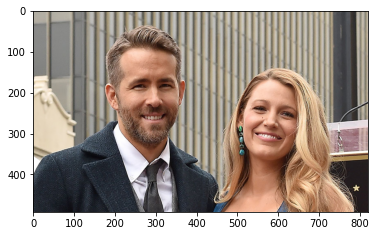

In [ ]:
# Face detection with MTCNN on the test image
from matplotlib import pyplot as plt
from mtcnn.mtcnn import MTCNN

filename = 'test_img.jpg'
img_pixel = plt.imread(filename)

data = plt.imread(filename)
print("Test image :")
plt.imshow(data)

In [ ]:
model_mtcnn = MTCNN()

# detect faces in the image
faces = model_mtcnn.detect_faces(img_pixel)
for face in faces:
	print(face)

{'box': [516, 171, 135, 183], 'confidence': 0.9999978542327881, 'keypoints': {'left_eye': (558, 239), 'right_eye': (623, 253), 'nose': (583, 276), 'mouth_left': (540, 297), 'mouth_right': (608, 314)}}
{'box': [204, 98, 155, 218], 'confidence': 0.9999903440475464, 'keypoints': {'left_eye': (260, 184), 'right_eye': (326, 182), 'nose': (301, 226), 'mouth_left': (262, 257), 'mouth_right': (329, 257)}}


In [ ]:
def recognize_faces(filename, result_list):
  data = plt.imread(filename)
  plt.imshow(data)

  ax = plt.gca() # Get Current axis

  for result in result_list:
    x, y, width, height = result['box']
    rect = plt.Rectangle((x, y), width, height, fill=False, color='green')
    ax.add_patch(rect)

  plt.show()

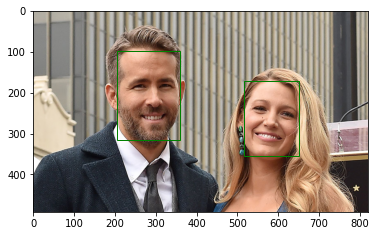

In [ ]:
recognize_faces(filename, faces)

In [ ]:
print("Total Number of faces detected : " ,len(faces))

Total Number of faces detected :  2


# **Encoding of the faces**

In [ ]:
pip install opencv-python

In [ ]:
pip install face_recognition

     |████████████████████████████████| 100.2MB 42kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566184 sha256=ccd61dec803d96f9eefbdc7ad7e95cc8a6f1b6dacf70f1f73ac7e606f376b0c3
  Stored in directory: /root/.cache/pip/wheels/d2/99/18/59c6c8f01e39810415c0e63f5bede7d83dfb0ffc039865465f
Successfully built face-recognition-models


In [ ]:
from imutils import paths
import face_recognition
import cv2
import os
import pickle

In [ ]:
!unzip Images.zip

Archive:  Images.zip
   creating: Images/Hugh_Jackman/
  inflating: Images/Hugh_Jackman/Hugh-Jackman.jpg  
  inflating: Images/Hugh_Jackman/penz65e_JJE32Jyp__1200x1642.jpg  
   creating: Images/Keanu_Reaves/
  inflating: Images/Keanu_Reaves/Keanu-Con-GQ-2019-050619.jpg  
  inflating: Images/Keanu_Reaves/keanu-reeves-crush-810x608-1561654179.jpg  
   creating: Images/Ryan_Reynolds/
  inflating: Images/Ryan_Reynolds/283233.jpg  
  inflating: Images/Ryan_Reynolds/Ryan-Reynolds.jpg  


In [ ]:
imagePaths = list(paths.list_images('Images'))
imagePaths

['Images/Ryan_Reynolds/Ryan-Reynolds.jpg',
 'Images/Ryan_Reynolds/283233.jpg',
 'Images/Keanu_Reaves/keanu-reeves-crush-810x608-1561654179.jpg',
 'Images/Keanu_Reaves/Keanu-Con-GQ-2019-050619.jpg',
 'Images/Hugh_Jackman/Hugh-Jackman.jpg',
 'Images/Hugh_Jackman/penz65e_JJE32Jyp__1200x1642.jpg']

In [ ]:
knownEncodings = []
knownNames = []

In [ ]:
for (i, imagePath) in enumerate(imagePaths):

    name = imagePath.split(os.path.sep)[-2]
    image = cv2.imread(imagePath)
    rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    boxes = face_recognition.face_locations(rgb,model='hog')
    encodings = face_recognition.face_encodings(rgb, boxes)
    for encoding in encodings:
        knownEncodings.append(encoding)
        knownNames.append(name)

data = {"encodings": knownEncodings, "names": knownNames}
f = open("face_enc", "wb")
f.write(pickle.dumps(data))
f.close()

In [ ]:
print(data)

{'encodings': [array([-8.17282051e-02,  2.31046870e-01, -5.87599091e-02, -6.14640266e-02,
       -1.10850796e-01,  3.63671593e-02, -2.74255443e-02, -3.98032069e-02,
        1.42150059e-01, -6.69900933e-03,  2.57344067e-01, -1.17770210e-01,
       -2.83013821e-01,  3.14066187e-02, -7.36464858e-02,  1.33133769e-01,
       -2.42038369e-01, -1.51498150e-03, -1.41561568e-01, -2.59723738e-02,
        1.53701052e-01,  5.88002615e-02, -3.04488949e-02,  6.93624243e-02,
       -1.30074620e-01, -3.05338800e-01, -2.63112783e-03, -7.44864047e-02,
        1.31518707e-01, -1.35155320e-01,  8.12031776e-02,  7.34161586e-05,
       -1.73727006e-01, -5.05728275e-03,  1.17671750e-02, -4.11085784e-04,
        7.39092333e-03, -3.88972238e-02,  1.60187110e-01,  4.65504788e-02,
       -1.13893755e-01,  1.07656337e-01,  3.36066075e-02,  3.19124877e-01,
        1.55700177e-01,  6.36143982e-02,  2.29594242e-02, -1.06038988e-01,
        7.25090280e-02, -3.09231579e-01,  1.07296277e-02,  1.68184489e-01,
        1.

# **Recognising detected faces**

In [ ]:
print("Recognizing Faces : ")

for i in range(len(faces)):

  x1, y1, width, height = faces[i]['box']
  x2 = x1 + width
  y2 = y1 + height
  face_data=img_pixel[y1:y2, x1:x2]

  rgb = cv2.cvtColor(face_data, cv2.COLOR_BGR2RGB)
  encoding = face_recognition.face_encodings(rgb)
  
  matches = face_recognition.compare_faces(data["encodings"],encoding[0])
  name = "Unknown"

  # check to see if we have found a match
  if True in matches:
      if matches[0]==True:
        matchedIdx=0
      elif matches[2]==True:
        matchedIdx=2
      elif matches[4]==True:
        matchedIdx=4
      name = data["names"][matchedIdx]
  print(name)


Recognizing Faces : 
Unknown
Ryan_Reynolds


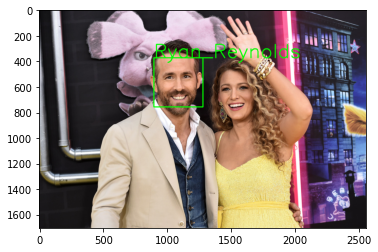

In [ ]:
import face_recognition
import imutils
import pickle
import time
import cv2
import os

faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_alt2.xml")

data = pickle.loads(open('face_enc', "rb").read())

image = plt.imread("test_img_2.jpg")

rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#convert image to Greyscale for haarcascade
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces_new = faceCascade.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(60, 60),flags=cv2.CASCADE_SCALE_IMAGE)
 
# the facial embeddings for face in input
encodings = face_recognition.face_encodings(rgb)
names = []

for encoding in encodings:
    
    matches = face_recognition.compare_faces(data["encodings"],encoding)
    name = "Unknown"

    if True in matches:
        matchedIdxs = [i for (i, b) in enumerate(matches) if b]
        counts = {}

        for i in matchedIdxs:
            #Check the names at respective indexes we stored in matchedIdxs
            name = data["names"][i]

            #increase count for the name we got
            counts[name] = counts.get(name, 0) + 1

            name = max(counts, key=counts.get)
 
        names.append(name)

        for ((x, y, w, h), name) in zip(faces_new, names):

            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 8)
            cv2.putText(image, name, (x, y), cv2.FONT_HERSHEY_SIMPLEX,5.0, (0, 255, 0), 8)
    plt.imshow(image)

# Thank you!